In [69]:
import pandas as pd
import math
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import urllib
import re
import unidecode
import time
import requests
from requests import Request, Session
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from __future__ import division
import re
import collections
import pickle
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import jieba
import json
import datetime as  datetime
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [32]:
'''data_100 = pd.read_csv('crawl_data/FAKE_NEWS.csv')
data_400 = pd.read_csv('crawl_data/result.csv', header=None) 
data_400_comment = pd.read_csv('crawl_data/comment(1).csv', header=None)

for i in range(0, len(data_100)):
    if data_100['post_time'][i] == 'None':
        data_100 = data_100.drop(index=[i])
data_100['post_time'] = pd.to_datetime(data_100['post_time'])
data_100 = data_100.reset_index()

for i in range(0, len(data_400)):
    if type(data_400[4][i]) == float:
        data_400 = data_400.drop(index=[i])

data_400[4] = pd.to_datetime(data_400[4])
data_400 = data_400.reset_index()

inform_id = []
for i in range(0, len(data_100)):
    item = data_100.loc[i]['link_to_post']
    item = re.findall(r'comment\/(.+)', item)[0]
    inform_id.append(item)
data_100['inform_id'] = inform_id

data_all = pd.DataFrame(columns = ['view_num','inform_num','inform_id', 'reported_id','reported_address',
                                   'post_time','reported_credit', 'weibo_content', 'repost_num', 'likes',
                                   'comment_num', 'id_tweets', 'id_following', 'id_follower']) 

data_all['view_num'] = data_100['view_num']
data_all['inform_num'] = data_100['inform_num']
data_all['inform_id'] = data_100['inform_id']
data_all['reported_id'] = data_100['reported_id']
data_all['reported_address'] = data_100['reported_address']
data_all['post_time'] = data_100['post_time']
data_all['reported_credit'] = data_100['reported_credit']
data_all['weibo_content'] = data_100['weibo_content']
data_all['repost_num'] = data_100['repost_num']
data_all['likes'] = data_100['thumbs_up']
data_all['comment_num'] = data_100['comment_num']
data_all['id_tweets'] = data_100['id_tweets']
data_all['id_following'] = data_100['id_following']
data_all['id_follower'] = data_100['id_follower']

for i in range(0, len(data_400)):
    data_all.loc[i+1496] = [data_400.loc[i][0], data_400.loc[i][1], data_400.loc[i][10], data_400.loc[i][2],
                     'unknown', data_400.loc[i][4], data_400.loc[i][6], data_400.loc[i][11], data_400.loc[i][13],
                     data_400.loc[i][12], data_400.loc[i][14], data_400.loc[i][9], data_400.loc[i][8], data_400.loc[i][7]] 

for i in range(0, 1496):
    ss = data_all['reported_credit'][i]
    data_all['reported_credit'][i] = re.findall(r'\'(.+)\'', ss)[0]    

    
for i in range(0, len(data_all)):
    data_all['reported_id'][i] = str(data_all['reported_id'][i])
    
    
data_a = data_all.drop(['txt_reported'], axis=1)
data_a.to_csv('crawl_data/FAKE_ALL.csv')
data_all  = pd.read_csv("crawl_data/FAKE_ALL.csv", dtype={'reported_id':str})'''
'''w = re.findall(r'\'(.)\'', data_100['comments'][0])
w

time = re.findall(r"(\d{2}月\d{2}日 \d{2}:\d{2})", data_100['comments'][0])
time

hanzi = re.sub("[A-Za-z0-9\!\%\,\。\月\日\/\']", "", data_100['comments'][0])
hanzi = re.sub("[\[\]]", "**", hanzi)

g = re.findall("\[([^\[\]]*)\]", hanzi)
re.findall("\[([^\[\]]*)\]", g[0])
re.split(r'\*', hanzi)    
'''

'w = re.findall(r\'\'(.)\'\', data_100[\'comments\'][0])\nw\n\ntime = re.findall(r"(\\d{2}月\\d{2}日 \\d{2}:\\d{2})", data_100[\'comments\'][0])\ntime\n\nhanzi = re.sub("[A-Za-z0-9\\!\\%\\,\\。\\月\\日\\/\']", "", data_100[\'comments\'][0])\nhanzi = re.sub("[\\[\\]]", "**", hanzi)\n\ng = re.findall("\\[([^\\[\\]]*)\\]", hanzi)\nre.findall("\\[([^\\[\\]]*)\\]", g[0])\nre.split(r\'\\*\', hanzi)    \n'

In [5]:
data_all = pd.read_csv("crawl_data/FAKE_ALL.csv", dtype={'reported_id':str})
comment = pd.read_csv('crawl_data/comment(1).csv',header=None, dtype={'1':str, '0':str})

In [6]:
fake_id = pd.DataFrame(data_all, columns=['inform_id', 'reported_id', 'post_time'])
comment_id = pd.DataFrame(comment, columns=[0, 1])

In [33]:
weibo_comment = pd.merge(data_all, comment, how='inner', left_on='inform_id', right_on=0)
weibo_comment.to_csv('crawl_data/FAKE_LINK.csv')

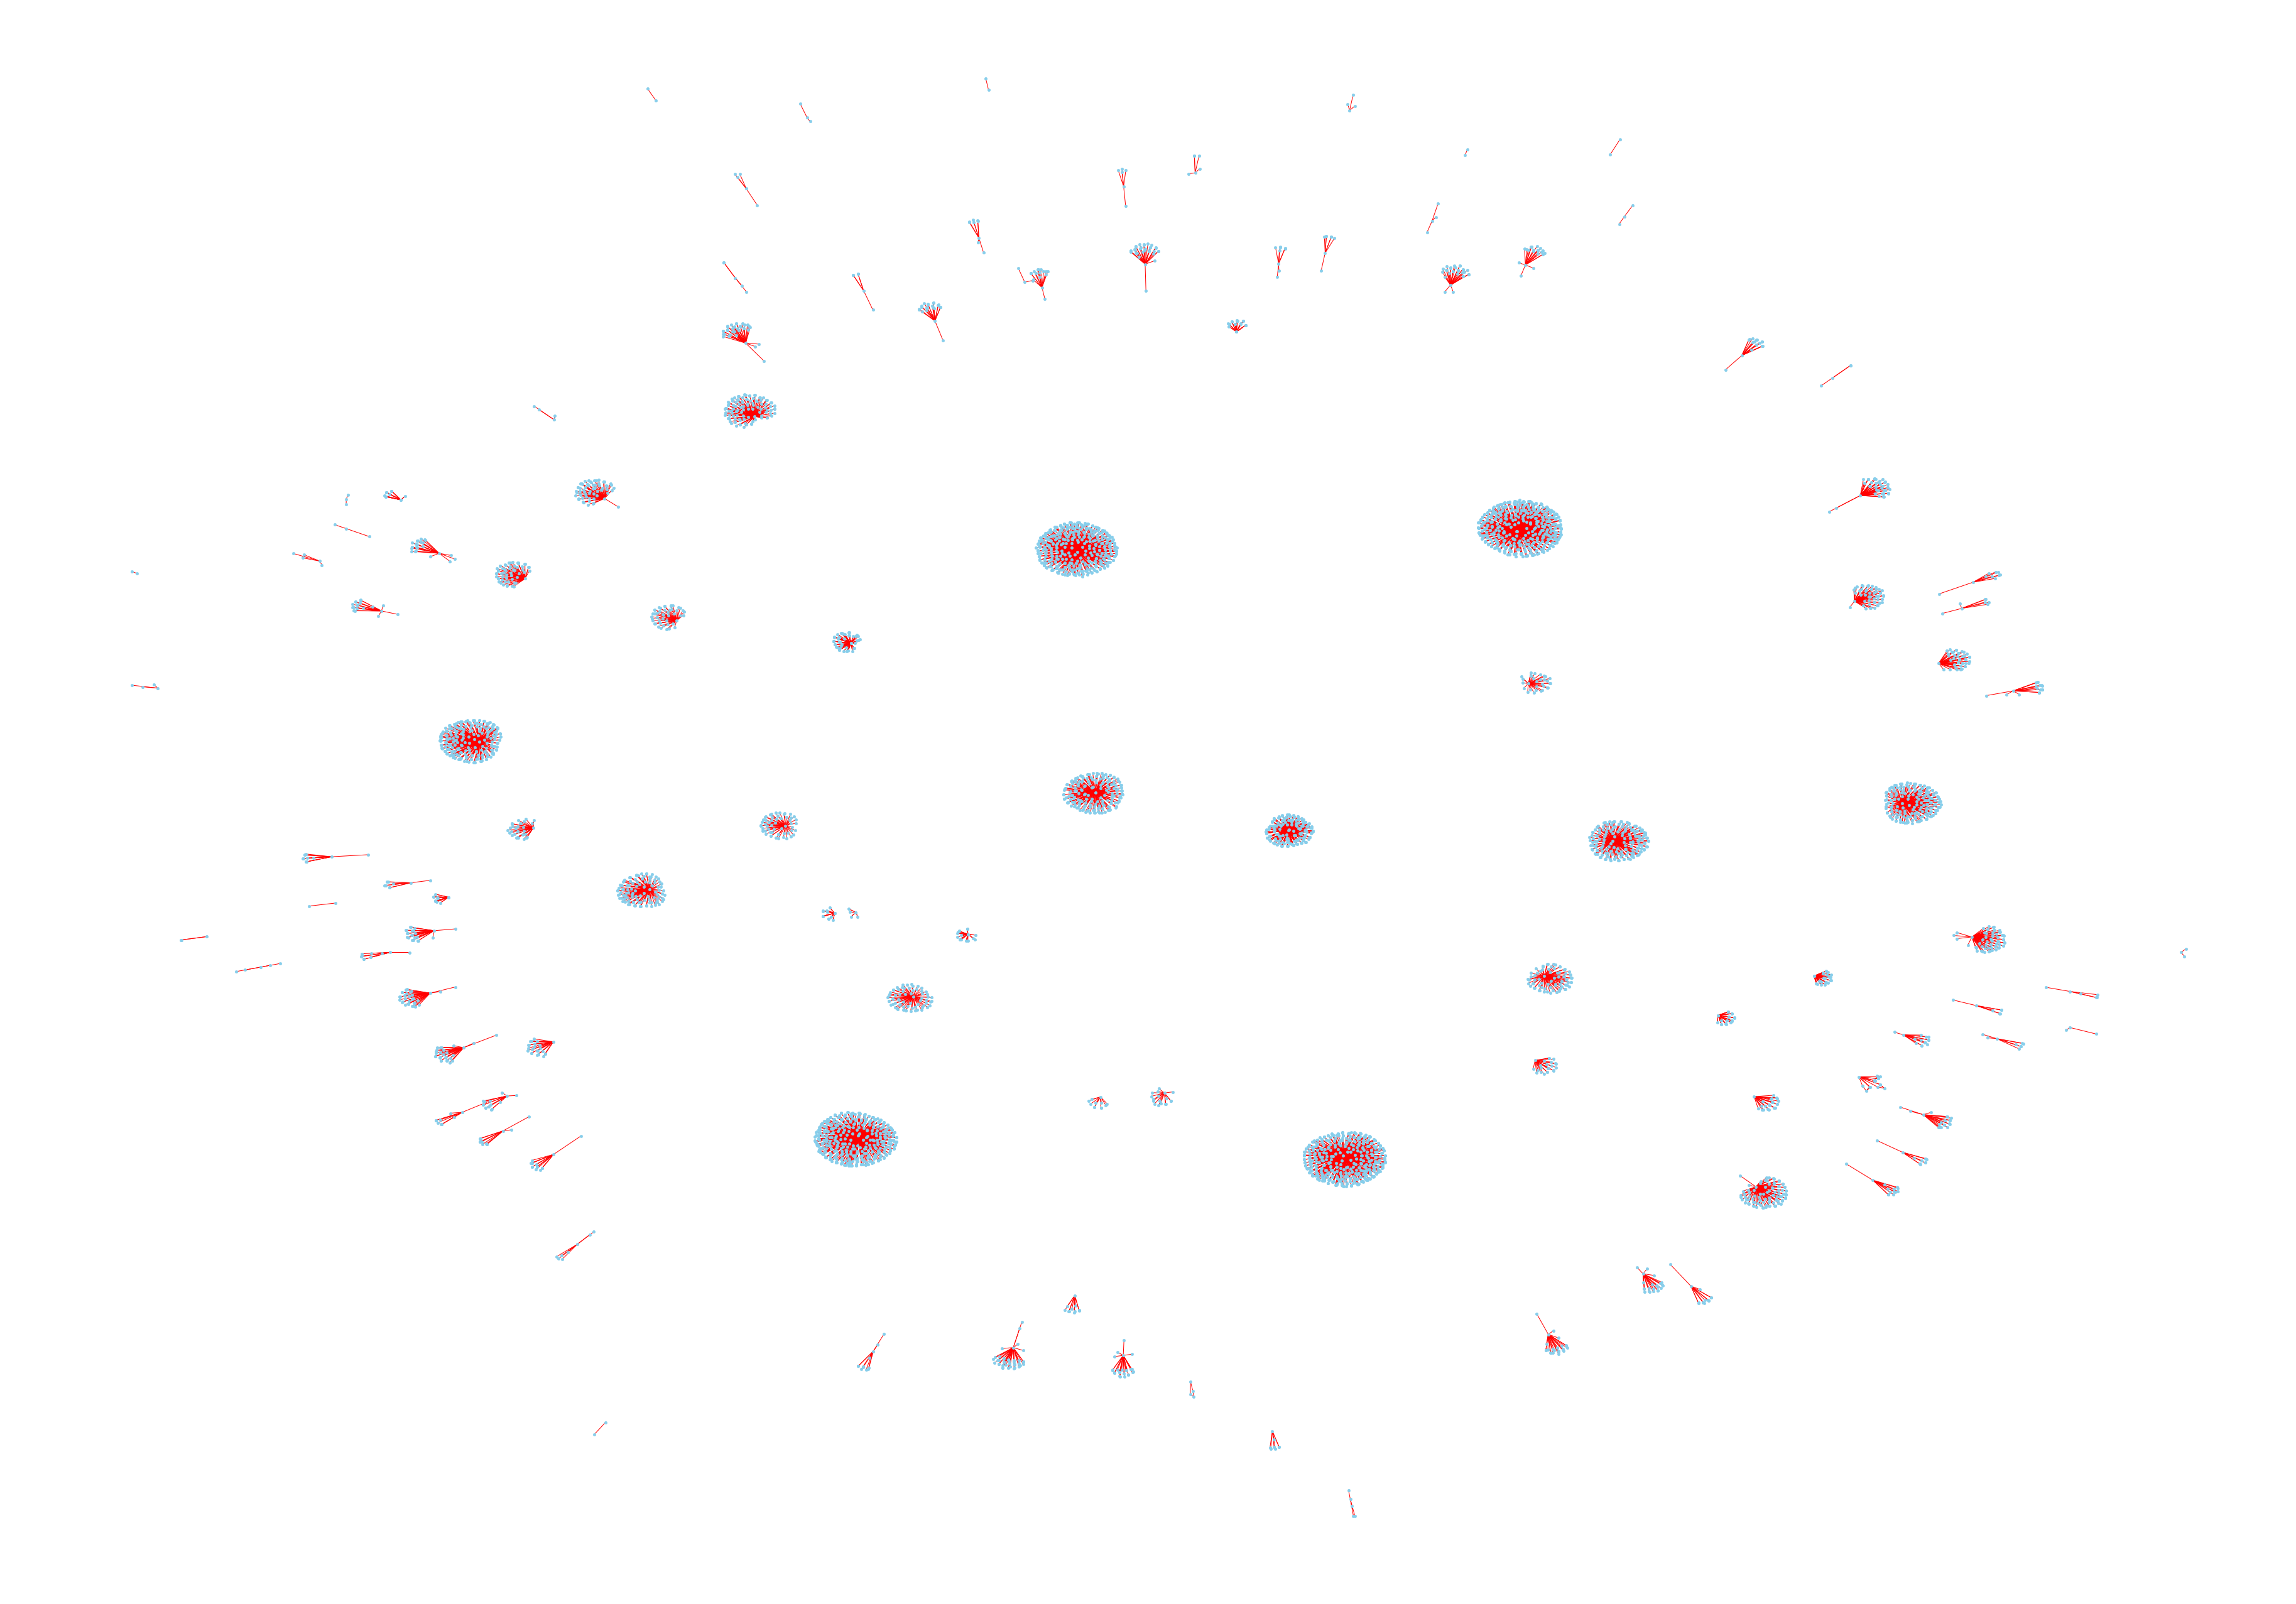

In [28]:
G = nx.from_pandas_edgelist(df=head, source='reported_id', target=1)
plt.figure(figsize=(50,35)) 

nx.draw(G, pos=nx.spring_layout(G), node_size=20, node_color='skyblue', edge_color = 'red',
    linewidths=0.55, with_labels=False, dpi=1000) 

plt.show() 

In [54]:
# fake news 2018
time_sort = data_all.sort_values(['post_time'])
time_e = time_sort[4328:]
time_e = shuffle(time_e)
time_e = time_e.reset_index()
time_e_comment = pd.merge(time_e, comment, how='inner', left_on='inform_id', right_on=0)

In [122]:
# 2 likes
# 3 comment
# 4 retweet
# real news
real = pd.read_csv('article_real.csv', header=None)
real_comment = pd.read_csv('realnews/comment.csv', header=None)
real = real.sort_values([1], ascending=False)
real_e = real[426:19981]
real_e = real_e.drop([0,1,2,3,4,5,6,7,8,9])
real_e = real_e.reset_index()
real_e_comment = pd.merge(real_e, real_comment, how='inner', left_on=0, right_on=0)
real_e_comment['label'] = 0
real_e_comment.columns = ['index', 'inform_id', 'post_time', 'likes', 'reply', 'retweet', 'weibo_content',
                         'link', 'comment_id', 'comment_likes', 'comment_time', 'comment', 'label']

In [152]:
data_all_content.to_csv('crawl_data/fake_text')

In [140]:
real_train = pd.DataFrame(real_e_comment, columns=['inform_id', 'reported_id', 'post_time', 'weibo_content',
                                                  'retweet', 'likes', 'reply', 'comment_id', 'comment_likes',
                                                  'comment_time','comment','label'] )

In [131]:
fake_train = pd.DataFrame(time_e_comment, columns=['inform_id', 'reported_id', 'post_time', 'reported_credit', 'weibo_content',
                                                  'repost_num', 'likes', 'comment_num', 'id_tweets', 'id_following',
                                                  1,2,3,4,'label'] )

In [ ]:
#loading events labels
events = {}
eid_train = time_e['inform_id'][0:3000]
eid_test = 
for i in range(0, len(data_all)):
    line = line.replace('\t',' ')
    line = line.split(' ')
    line.remove('\n')

    label = line[1][-1]
    eid = line[0][4:]
    events[eid] = label
    

path = 'Data/Weibo'
train_dict_ = {}
test_dict_ = {}


# defining train, test , validation datasets
splits = json.load(open('Data/Weiboeids','r'))
eid_train = splits['train']
eid_test = splits['test']
eid_val = splits['validation']


In [ ]:
for event in tqdm(eid_train+eid_test):
    event_str = str(event)
    tweets = json.load(open(os.path.join(path,event_str+'.json'),"r",encoding='utf-8'))
    timestamps = []
    uid = []
    text = []
    n = len(tweets)
    index = 100
    if event in eid_test:
        index = 10
    tweets = tweets[:index]
    for tweet in tweets:
        timestamps.append(tweet['t'])
        uid.append(tweet['uid'])
        text.append(tweet['text'])
    messages = {'timestamps':timestamps,'uid':uid,'text':text,'label':events[event_str]}
    if event in eid_train:
        train_dict_[event_str] = messages
    else:
        test_dict_[event_str] = messages
        